In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define stock list and time window
tickers = [
    'INFY.NS', 'TCS.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'RELIANCE.NS',
    'LT.NS', 'ASIANPAINT.NS', 'HINDUNILVR.NS', 'BAJFINANCE.NS', 'SBIN.NS'
]
start_date = '2022-07-01'
end_date = '2025-07-23'

# Step 2: Download adjusted close prices
data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Step 3: Drop rows with any NaNs (missing values)
data.dropna(inplace=True)

# Step 4: Calculate daily returns
daily_returns = data.pct_change().dropna()

# Step 5: Annualized return and covariance
annual_returns = daily_returns.mean() * 252
cov_matrix = daily_returns.cov() * 252

# Display
print("Annualized Returns:")
print(annual_returns)

print("\nAnnualized Covariance Matrix:")
print(cov_matrix)

/tmp/ipython-input-1-2616724153.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  10 of 10 completed

Annualized Returns:
Ticker
ASIANPAINT.NS   -0.023876
BAJFINANCE.NS    0.214749
HDFCBANK.NS      0.162668
HINDUNILVR.NS    0.062487
ICICIBANK.NS     0.271802
INFY.NS          0.074826
LT.NS            0.306000
RELIANCE.NS      0.104808
SBIN.NS          0.234462
TCS.NS           0.020689
dtype: float64

Annualized Covariance Matrix:
Ticker         ASIANPAINT.NS  BAJFINANCE.NS  HDFCBANK.NS  HINDUNILVR.NS  \
Ticker                                                                    
ASIANPAINT.NS       0.038162       0.014840     0.007724       0.012038   
BAJFINANCE.NS       0.014840       0.067068     0.018321       0.006574   
HDFCBANK.NS         0.007724       0.018321     0.037890       0.004204   
HINDUNILVR.NS       0.012038       0.006574     0.004204       0.036247   
ICICIBANK.NS        0.007202       0.017012     0.016838       0.003608   
INFY.NS             0.007095       0.016115     0.011002       0.009523   
LT.NS               0.010171       0.015416     0.017312       0.00

| Metric          | Formula                          | What It Means                    |
| --------------- | -------------------------------- | -------------------------------- |
| Return          | $R_p = \sum w_i R_i$             | Weighted average return          |
| Volatility      | $\sigma_p = \sqrt{w^T \Sigma w}$ | Total portfolio risk             |
| Sharpe Ratio    | $\frac{R_p - R_f}{\sigma_p}$     | Risk-adjusted return             |
| Negative Sharpe | $-$ of above                     | So we can minimize it (optimize) |


In [2]:
# Step 2: Portfolio Metrics Functions

# 1. Portfolio Expected Return
def portfolio_return(weights, returns):
    return np.dot(weights, returns)

# 2. Portfolio Volatility
def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# 3. Negative Sharpe Ratio (we minimize this to maximize Sharpe)
def negative_sharpe_ratio(weights, returns, cov_matrix, risk_free_rate=0.06):
    port_return = portfolio_return(weights, returns)
    port_vol = portfolio_volatility(weights, cov_matrix)
    sharpe = (port_return - risk_free_rate) / port_vol
    return -sharpe

In [3]:
data

Ticker,ASIANPAINT.NS,BAJFINANCE.NS,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INFY.NS,LT.NS,RELIANCE.NS,SBIN.NS,TCS.NS
Date,,,,,,,,,,
2022-07-01,2690.251953,553.612671,1306.003662,2171.364990,688.065308,1370.467041,1512.199829,1100.364746,441.532074,3156.229492
2022-07-04,2706.889404,555.180481,1307.836670,2259.699707,703.900818,1378.433716,1521.385620,1102.648926,447.774139,3080.016113
2022-07-05,2683.897949,558.217468,1304.894287,2284.720947,703.265503,1367.270996,1505.226196,1111.579834,446.544647,3062.164307
2022-07-06,2775.863770,583.421143,1322.886475,2376.908691,709.619263,1381.814941,1496.810059,1101.803589,453.921661,3104.484375
2022-07-07,2804.967041,577.899231,1346.570557,2352.696289,725.308228,1388.345825,1549.664429,1090.953979,460.352844,3130.285645
...,...,...,...,...,...,...,...,...,...,...
2025-07-16,2410.500000,921.750000,1996.300049,2517.600098,1426.400024,1607.900024,3503.800049,1485.599976,831.700012,3233.100098
2025-07-17,2398.899902,923.299988,1986.900024,2509.800049,1418.699951,1583.500000,3474.000000,1476.400024,829.000000,3209.199951
2025-07-18,2382.399902,942.000000,1957.400024,2489.600098,1425.800049,1586.099976,3464.800049,1476.000000,823.349976,3189.899902


In [4]:
log_returns = np.log(data / data.shift(1)).dropna()

In [5]:
# Calculate mean returns (expected return per stock)
mean_returns = log_returns.mean()

# Calculate covariance matrix of stock returns
cov_matrix = log_returns.cov()

In [6]:
import scipy.optimize as sco

In [7]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -(portfolio_return - risk_free_rate) / portfolio_volatility

In [8]:
num_assets = len(tickers)
initial_weights = [1/num_assets] * num_assets
bounds = tuple((0, 1) for asset in range(num_assets))
constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}

In [9]:
constraints

{'type': 'eq', 'fun': <function __main__.<lambda>(weights)>}

In [10]:
opt_results = sco.minimize(
    neg_sharpe_ratio,
    initial_weights,
    args=(mean_returns, cov_matrix, 0),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

In [11]:
optimal_weights = opt_results.x
optimal_weights

array([5.74972424e-19, 5.79174684e-02, 0.00000000e+00, 3.33369041e-02,
       5.93905111e-01, 0.00000000e+00, 3.14840517e-01, 2.84304367e-17,
       1.96850940e-17, 0.00000000e+00])

In [12]:
optimal_weights.sum()

np.float64(1.0000000000000002)

PORTFOLIO ALLOCATION

In [13]:
# Create a DataFrame to display stock names with their optimal weights
optimal_weights_df = pd.DataFrame({
    'Stock': data.columns,
    'Optimal Weight': optimal_weights
})

# Filter to show only non-zero allocations (to avoid clutter)
optimal_weights_df = optimal_weights_df[optimal_weights_df['Optimal Weight'] > 0.01]

# Sort descending
optimal_weights_df = optimal_weights_df.sort_values(by='Optimal Weight', ascending=False)

optimal_weights_df.reset_index(drop=True, inplace=True)
optimal_weights_df

,Stock,Optimal Weight
0,ICICIBANK.NS,0.593905
1,LT.NS,0.314841
2,BAJFINANCE.NS,0.057917
3,HINDUNILVR.NS,0.033337


In [14]:
# Portfolio Expected Return
optimal_return = np.sum(optimal_weights * mean_returns) * 252  # Annualized

# Portfolio Volatility
optimal_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights))) * np.sqrt(252)

# Sharpe Ratio
risk_free_rate = 0.0  # You can also set to 0.06 if you want to use India’s avg RF rate
optimal_sharpe = (optimal_return - risk_free_rate) / optimal_volatility

print(f"Optimal Portfolio Return: {optimal_return:.2%}")
print(f"Optimal Portfolio Volatility: {optimal_volatility:.2%}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe:.2f}")

Optimal Portfolio Return: 25.04%
Optimal Portfolio Volatility: 16.24%
Optimal Sharpe Ratio: 1.54


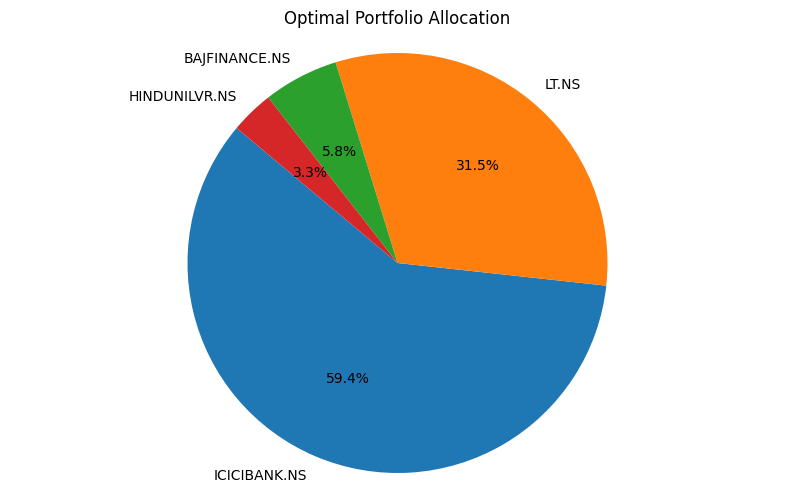

In [15]:
import matplotlib.pyplot as plt

# Only show non-zero weights
non_zero_alloc = optimal_weights_df[optimal_weights_df['Optimal Weight'] > 0]

plt.figure(figsize=(10, 6))
plt.pie(non_zero_alloc['Optimal Weight'], labels=non_zero_alloc['Stock'], autopct='%1.1f%%', startangle=140)
plt.title('Optimal Portfolio Allocation')
plt.axis('equal')
plt.show()


BACKTEST THE OPTIMIZED PORTFOLIO

In [16]:
import yfinance as yf

# Define the same stock tickers
tickers = ['ICICIBANK.NS', 'LT.NS', 'BAJFINANCE.NS', 'HINDUNILVR.NS']

# Download adjusted close prices
price_data = yf.download(tickers, start='2022-07-01', end='2025-07-23')['Close']

# Drop any rows with missing data
price_data.dropna(inplace=True)

price_data.head()


/tmp/ipython-input-16-473541177.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  price_data = yf.download(tickers, start='2022-07-01', end='2025-07-23')['Close']
[*********************100%***********************]  4 of 4 completed


Ticker,BAJFINANCE.NS,HINDUNILVR.NS,ICICIBANK.NS,LT.NS
Date,,,,
2022-07-01,553.612671,2171.364990,688.065308,1512.199829
2022-07-04,555.180481,2259.699707,703.900818,1521.385620
2022-07-05,558.217468,2284.720947,703.265503,1505.226196
2022-07-06,583.421143,2376.908691,709.619263,1496.810059
2022-07-07,577.899231,2352.696289,725.308228,1549.664429


In [17]:
# Calculate daily log returns
log_returns = np.log(price_data / price_data.shift(1)).dropna()

log_returns.head()

Ticker,BAJFINANCE.NS,HINDUNILVR.NS,ICICIBANK.NS,LT.NS
Date,,,,
2022-07-04,0.002828,0.039876,0.022754,0.006056
2022-07-05,0.005455,0.011012,-0.000903,-0.010678
2022-07-06,0.044161,0.039557,0.008994,-0.005607
2022-07-07,-0.009510,-0.010239,0.021868,0.034702
2022-07-08,0.002131,0.009618,0.018295,0.046301


In [18]:
# Use the optimal weights you got earlier
optimal_weights = np.array([0.593905, 0.314840, 0.057918, 0.033337])  # Replace if needed

# Portfolio log return = dot product of stock returns and weights
portfolio_log_returns = log_returns.dot(optimal_weights)

portfolio_log_returns.head()

,0
Date,
2022-07-04,0.015754
2022-07-05,0.006299
2022-07-06,0.039015
2022-07-07,-0.006448
2022-07-08,0.006897


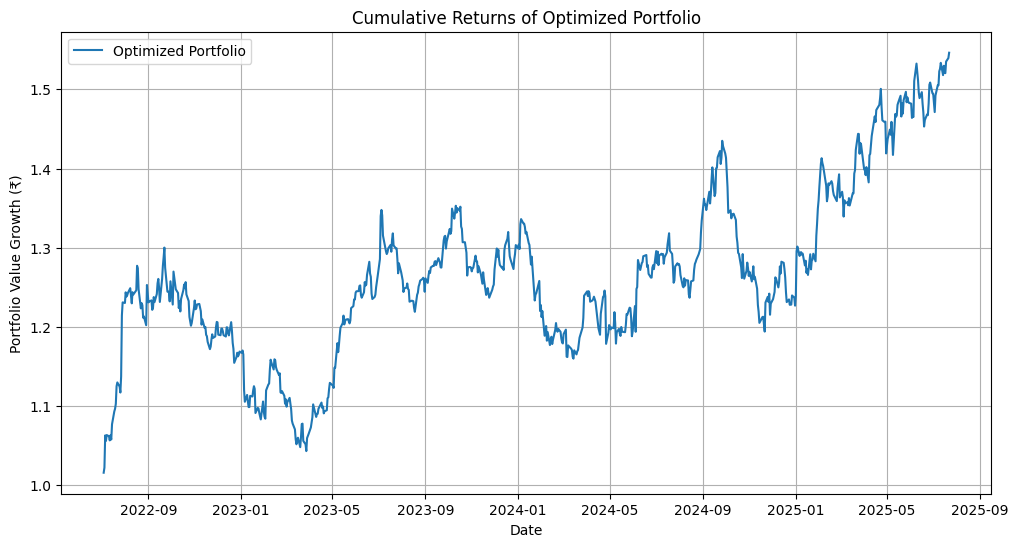

In [19]:
# Cumulative returns = e^(cumulative log return)
cumulative_return = np.exp(portfolio_log_returns.cumsum())

# Plot it
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(cumulative_return, label='Optimized Portfolio')
plt.title('Cumulative Returns of Optimized Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Value Growth (₹)')
plt.legend()
plt.grid(True)
plt.show()

MONTHLY RETURN

In [20]:
# Resample to monthly returns
monthly_returns = portfolio_log_returns.resample('M').sum()
monthly_returns = np.exp(monthly_returns) - 1  # Convert log to normal %

monthly_returns.tail(12)  # Last 12 months

/tmp/ipython-input-20-160735897.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = portfolio_log_returns.resample('M').sum()


,0
Date,
2024-08-31,0.042745
2024-09-30,0.063597
2024-10-31,-0.108937
2024-11-30,-0.027661
2024-12-31,-0.002096
2025-01-31,0.108353
2025-02-28,0.002724
2025-03-31,0.048949
2025-04-30,-0.007790


In [21]:
cumulative_return

,0
Date,
2022-07-04,1.015879
2022-07-05,1.022297
2022-07-06,1.062971
2022-07-07,1.056139
2022-07-08,1.063448
...,...
2025-07-16,1.521345
2025-07-17,1.520467
2025-07-18,1.535080


Max. Drawdown

Maximum Drawdown: -19.77%


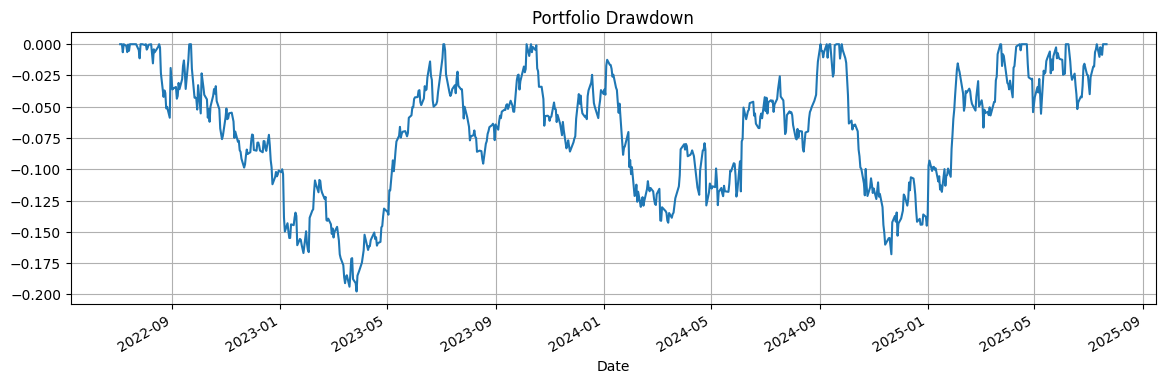

In [22]:
rolling_max = cumulative_return.cummax()
drawdown = cumulative_return / rolling_max - 1
max_drawdown = drawdown.min()

print(f"Maximum Drawdown: {max_drawdown:.2%}")
drawdown.plot(figsize=(14, 4), title='Portfolio Drawdown')
plt.grid(True)
plt.show()

**PyPortfolioOpt**

In [23]:
# Install the library if not already installed
!pip install -q PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 7.5 MB/s eta 0:00:00


In [24]:
# Step 1: Import libraries
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [27]:
# Step 2: Calculate expected returns and sample covariance matrix
mu = mean_historical_return(data)
S = CovarianceShrinkage(data).ledoit_wolf()

This is the engine that will help us find optimal weights and maximize Sharpe Ratio -->

In [31]:
# Step 3: Create Efficient Frontier object
ef = EfficientFrontier(mu, S)

This finds the best combination of stock weights that give highest Sharpe ratio. -->

In [32]:
# Step 4: Optimize for maximum Sharpe Ratio
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

In [33]:
cleaned_weights

OrderedDict([('ASIANPAINT.NS', 0.0),
             ('BAJFINANCE.NS', 0.05633),
             ('HDFCBANK.NS', 0.0),
             ('HINDUNILVR.NS', 0.02193),
             ('ICICIBANK.NS', 0.58246),
             ('INFY.NS', 0.0),
             ('LT.NS', 0.33928),
             ('RELIANCE.NS', 0.0),
             ('SBIN.NS', 0.0),
             ('TCS.NS', 0.0)])

In [34]:
# Step 5: Portfolio performance summary
performance = ef.portfolio_performance(verbose=True)

Expected annual return: 28.9%
Annual volatility: 16.3%
Sharpe Ratio: 1.77


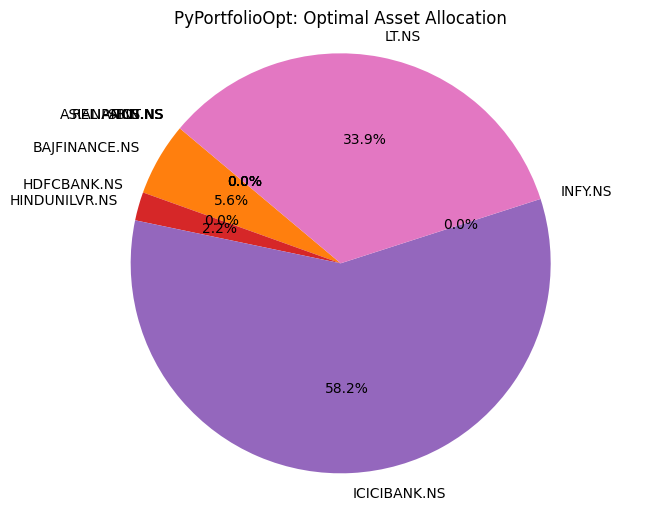

In [35]:
import matplotlib.pyplot as plt

labels = list(cleaned_weights.keys())
sizes = list(cleaned_weights.values())

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("PyPortfolioOpt: Optimal Asset Allocation")
plt.axis('equal')
plt.show()

₹10,00,000 ALLOCATION

In [36]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [37]:
# Step 1: Get the latest prices of the 10 stocks
latest_prices = get_latest_prices(data)

In [38]:
latest_prices

,2025-07-22
Ticker,
ASIANPAINT.NS,2365.199951
BAJFINANCE.NS,952.549988
HDFCBANK.NS,2007.099976
HINDUNILVR.NS,2479.699951
ICICIBANK.NS,1473.599976
INFY.NS,1570.900024
LT.NS,3464.600098
RELIANCE.NS,1412.800049
SBIN.NS,815.000000


In [39]:
# Step 2: Define the total portfolio value
portfolio_value = 10_00_000  # ₹10 lakhs

In [40]:
#Step 3: Use cleaned_weights from Efficient Frontier
allocation = DiscreteAllocation(
    weights=cleaned_weights,
    latest_prices=latest_prices,
    total_portfolio_value=portfolio_value
)

In [41]:
# Step 4: Get the number of shares to buy and leftover funds
allocation_result, leftover_amount = allocation.lp_portfolio()

In [42]:
allocation_result

{'BAJFINANCE.NS': 58, 'HINDUNILVR.NS': 9, 'ICICIBANK.NS': 395, 'LT.NS': 98}

In [43]:
leftover_amount

np.float64(832.0010801345343)

In [44]:
# Step 5: Print results
print("Discrete Allocation of ₹10,00,000:\n")
for stock, shares in allocation_result.items():
    print(f"{stock}: {shares} shares")

print(f"\nFunds Remaining (Unallocated): ₹{round(leftover_amount, 2)}")

Discrete Allocation of ₹10,00,000:

BAJFINANCE.NS: 58 shares
HINDUNILVR.NS: 9 shares
ICICIBANK.NS: 395 shares
LT.NS: 98 shares

Funds Remaining (Unallocated): ₹832.0
